# ST1/ST1G Assignment 9 (Capstone Programming Project)

github link:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/capstone

/content/drive/MyDrive/capstone


In [ ]:
!ls

DataForML.pkl  Final_Decision_Tree_Model.pkl  Medical_insurance.csv


This Project is based on the Medical Insurance Price Prediction data available from Kaggle repository:
(https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction)


*   It contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region.
*   My project task is to train a machine learning model that can predict medical expenses for new customers.


*   For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on
(machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.






# Step 1: Reading the data

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
import pandas as pd
import numpy as np

InsuranceData=pd.read_csv('/content/drive/MyDrive/capstone/Medical_insurance.csv', encoding='latin')
print('Shape before deleting duplicate values:', InsuranceData.shape)

# Removing duplicate rows if any
InsuranceData=InsuranceData.drop_duplicates()
print('Shape After deleting duplicate values:', InsuranceData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
InsuranceData.head(10)

Shape before deleting duplicate values: (2772, 7)
Shape After deleting duplicate values: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Key observations from Step 1 about Data Description**

*   The file contains 1337 customer details of a medical insurance company.
*   There are 7 attributes and they are outlined below.
*   age - the customer's age.
*   sex - the customer's sex.
*   bmi - the customer's BMI(Body Mass Index).
*   children - how many children the customer has.
*   smoker - if the customer is a smoker(yes/no).
*   region - the region where the customer live.
*   charges - the medical expenses for the customer











# Step 2 : Problem Statement Definition


*   Creating a prediction model to predict medical expenses(charges) for new customers.
*   Target Variable: charges. Predictors/Features: age, sex, bmi, children, smoker, region.



# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.


*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.



# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.


*   If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
*   Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
*  When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight
skewed version of it.
*   Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.



<Axes: >

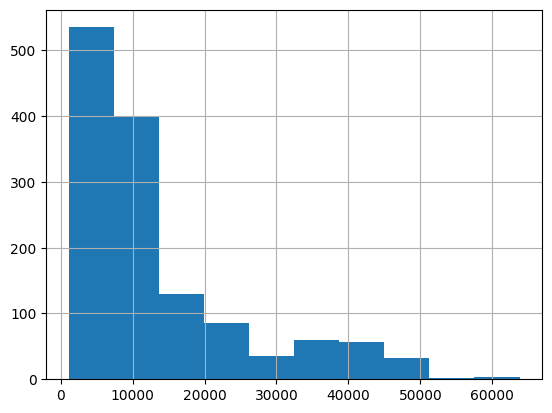

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the charges values
InsuranceData['charges'].hist()

**Observations from Step 4**


*   The data distribution of the target variable is satisfactory to proceed further.
*   There are sufficient number of rows for each type of values to learn from.



# Step 5: Basic Exploratory Data Analysis

In [ ]:
# Looking at sample rows in the data
InsuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Looking at sample rows in the data
InsuranceData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
InsuranceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# Looking at the descriptive statistics of the data
InsuranceData.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
InsuranceData.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

**Observations from Step 5 - Basic Exploratory Data Analysis**

*   age - Continuous. Selected.
*   sex - Categorical. Selected.
*   bmi - Continuous. Selected.
*   children - Categorical. Selected.
*   smoker - Categorical. Selected.
*   region - Categorical. Selected.
*   charges - Continuous. Selected. Target variable.










# Step 7: Removing Unwanted columns


*   There are no qualitative columns in the data.
*   Hence no need to remove any column.



# Step 8: Visual Exploratory Data Analysis


*   Based on the Basic Exploration Data Analysis in the previous step, we could spotted four categorical predictors in the data.
*   Categorical Predictors:
*   sex
*   children
*   smoker
*   region
*   We will use bar charts to see how the data is distributed for these categorical columns.






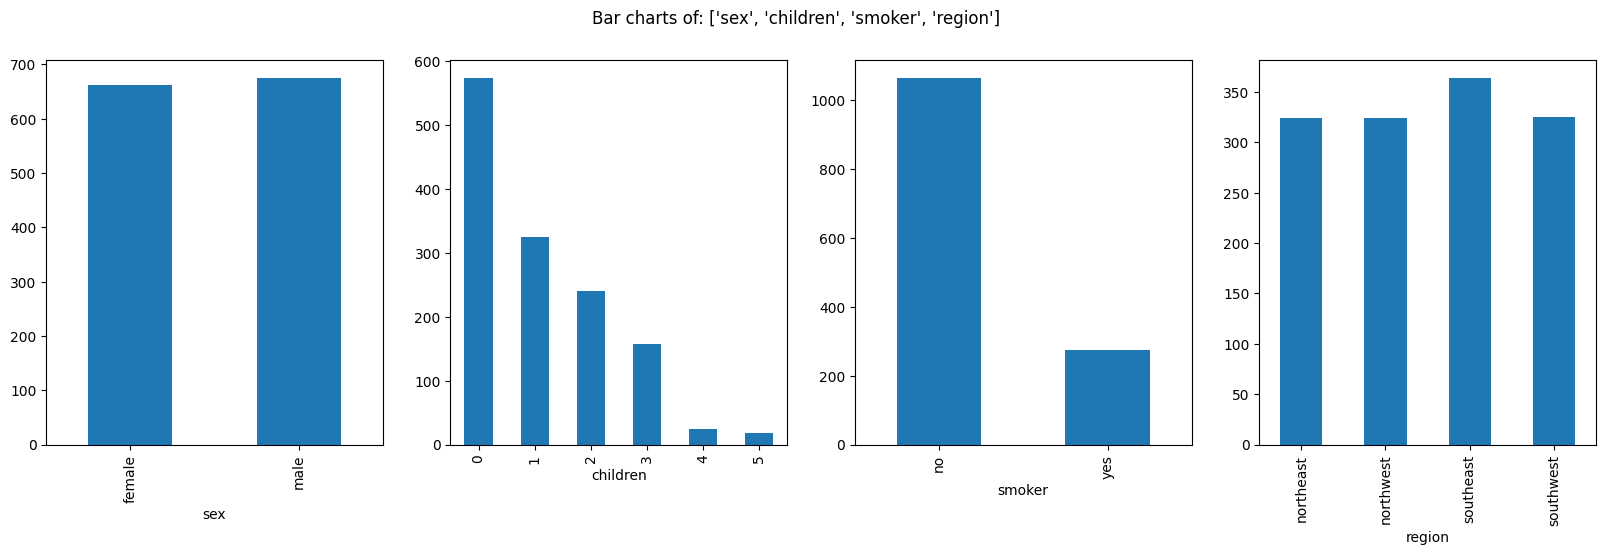

In [ ]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=InsuranceData, colsToPlot=['sex','children','smoker','region'])

**Observations from Step 8 - Visual Exploratory Data Analysis**


*   Selected Categorical Variables ('sex', 'children','smoker','region'):
*   All the categorical variables are selected for further analysis.



# Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms


*   Based on the Basic Exploratory Data Analysis, there are two continuous predictor variables:
*   'age', 'bmi'.






array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

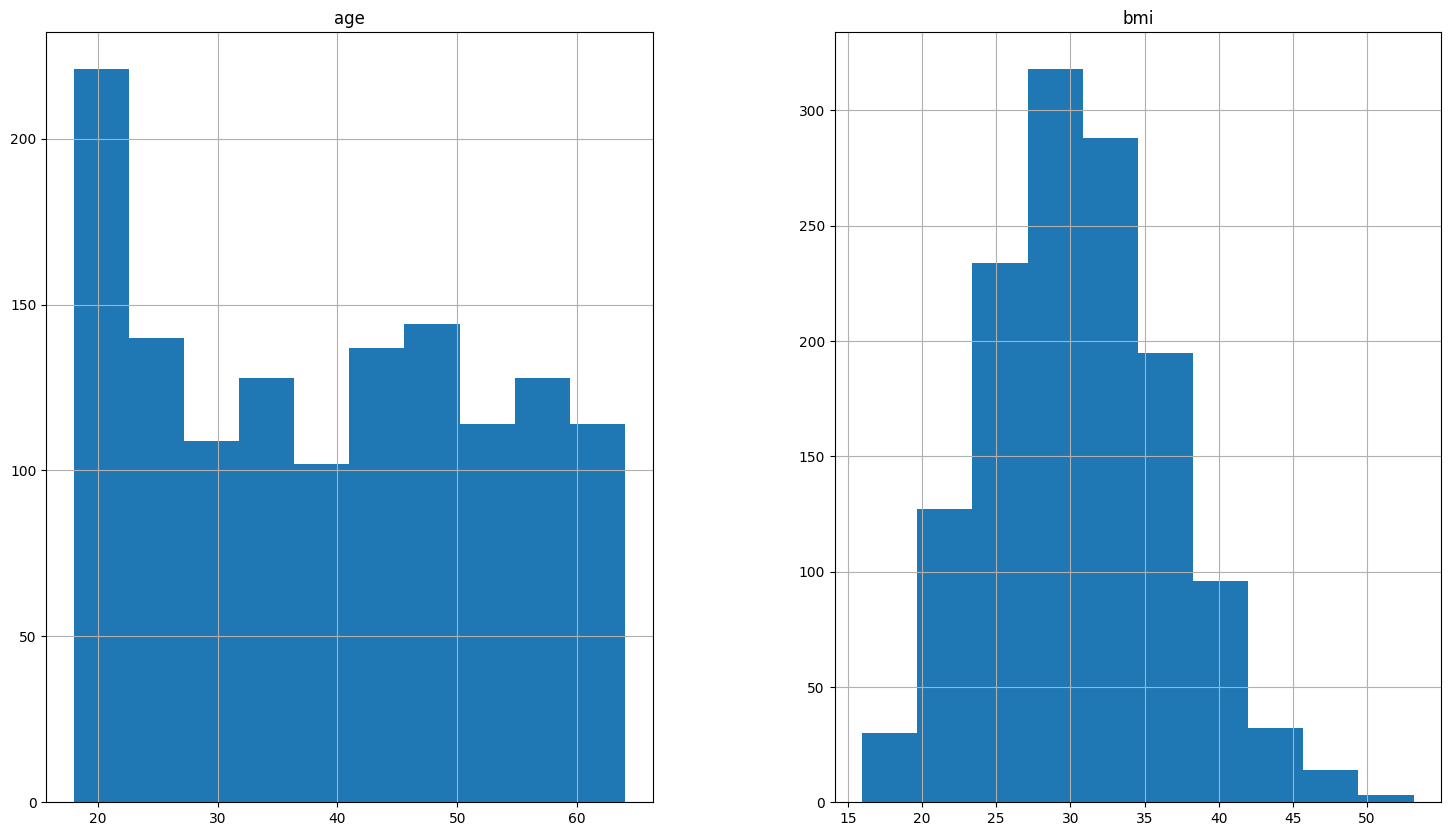

In [ ]:
# Plotting histograms of multiple columns together
InsuranceData.hist(['age', 'bmi'], figsize=(18,10))

**Observations from Step 9**


*   Selected Continuous Variables:
*   age - Selected. The distribution is good.
*   bmi - Selected. The distribution is good.






# Step 10: Outlier Analysis


*   No  extreme values in the data. Therefore no outliers.




# Step 11:Visualising Data Distribution after outlier removal


*   not applicable. No outlier is removed.




# Step 12: Missing Values Analysis


In [ ]:
# Finding how many missing values are there for each column
InsuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations from Step 12: Missing Value Analysis**


*   No missing values in this data!
*   So no removal of any data samples(rows) is needed.



# Step 13: Feature Selection (Attribute Selection)


*   For this dataset, the Target variable is Continuous, hence following two scenarios will need attention.
*   Continuous Target Variable Vs Continuous Predictor.
*   Continuous Target Variable Vs Categorical Predictor

**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

*   When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables
using scatter plot and measure the strength of relation using a metric called pearson's correlation value.





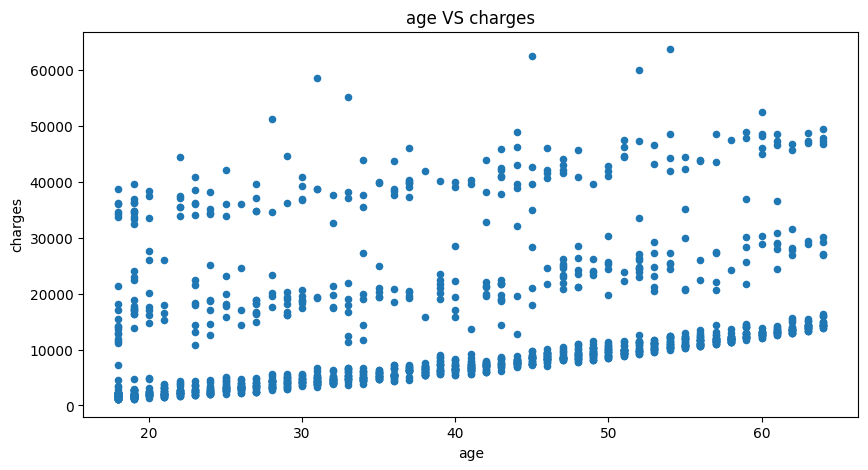

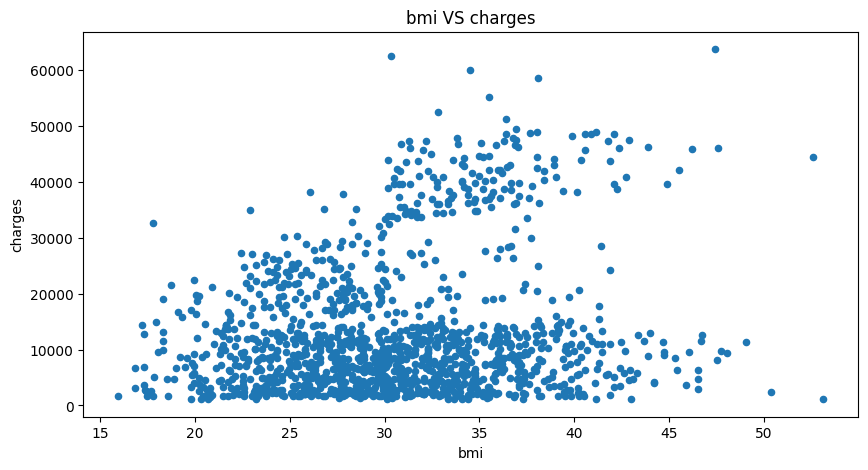

In [ ]:
ContinuousCols= ['age','bmi']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  InsuranceData.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

**Scatter charts interpretation**


*   age VS charges shows an Increasing Trend.
*   bmi VS charges shows an Increasing Trend.



# Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value


*   This value can be calculated only between two numeric columns Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend.
*   Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend.
*   Correlation near {0} means No relationship, the scatter plot will show no clear trend.
*   If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter.
*   We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are
actually related to the target variable in question.





In [ ]:
# Calculating correlation matrix
ContinuousCols=['charges','age','bmi']

# Creating the correlation matrix
CorrelationData=InsuranceData[ContinuousCols].corr()
CorrelationData

,charges,age,bmi
charges,1.000000,0.298308,0.198401
age,0.298308,1.000000,0.109344
bmi,0.198401,0.109344,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5 ]

charges    1.0
Name: charges, dtype: float64

In [ ]:
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.19 ]

charges    1.000000
age        0.298308
bmi        0.198401
Name: charges, dtype: float64

**Observations from Step 14**


*   Final selected Continuous columns:
*   'age','bmi'.



# Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots


*   When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
Measure the strength of relation using Anova test.




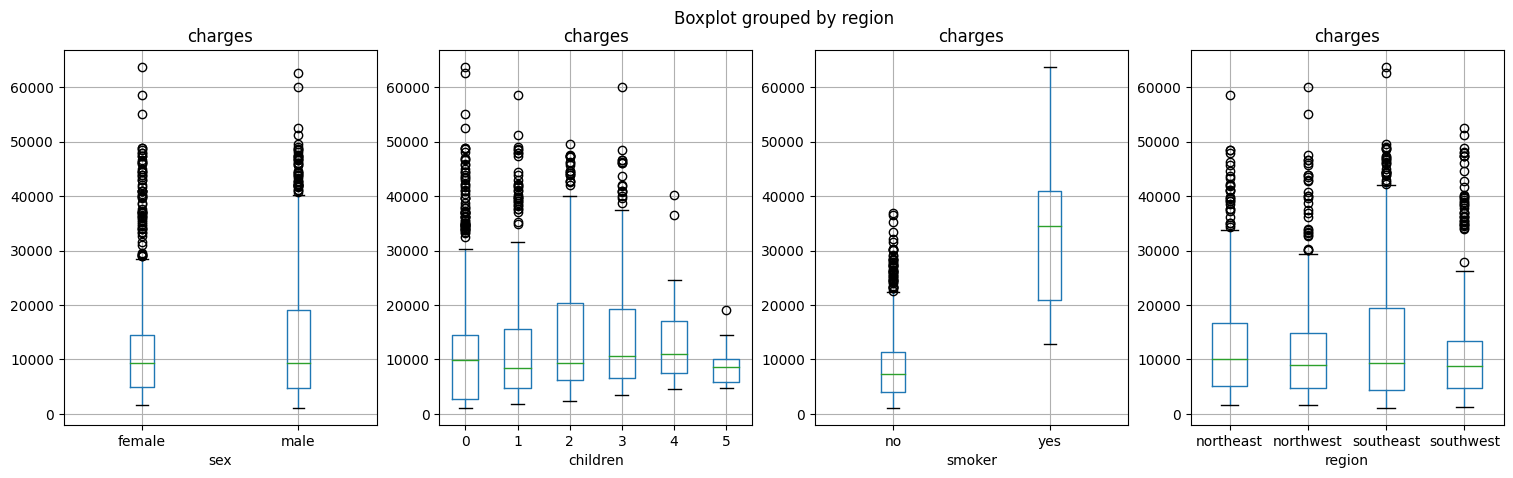

In [ ]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex','children','smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "charges"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  InsuranceData.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Observations from Step 15: Box-Plots interpretation**


*   If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the
target variable. Hence, the variables are not correlated to each other.
*   On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be
correlated with charges.
*   For this datadata, children, smoker, region look correlated with the Target variable.







# Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test


*   Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
*   Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable).
*   ANOVA Test result: Probability of H0 (Null Hypothesis being true)




In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
  return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex','children','smoker', 'region']
FunctionAnova(inpData=InsuranceData,
TargetVariable='charges',
CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is correlated with charges | P-Value: 0.033820791995078286
children is correlated with charges | P-Value: 0.006133448188169501
smoker is correlated with charges | P-Value: 1.4067220949358597e-282
region is correlated with charges | P-Value: 0.03276288025444947


['sex', 'children', 'smoker', 'region']



*   The results of ANOVA confi rm our visual analysis using box plots above.
*   All categorical variables are correlated with the Target variable.
*   Final selected Categorical columns: 'sex', 'children', 'smoker', 'region'.






**Selecting final Predictors/Features for building Machine Learning/AI model.**


*   Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning
model building as:
*   'age','bmi', 'sex', 'children', 'smoker', 'region'.




In [ ]:
SelectedColumns=['age','bmi', 'sex', 'children', 'smoker', 'region']

# Selecting final columns
DataForML=InsuranceData[SelectedColumns]
DataForML.head()

,age,bmi,sex,children,smoker,region
0,19,27.900,female,0,yes,southwest
1,18,33.770,male,1,no,southeast
2,28,33.000,male,3,no,southeast
3,33,22.705,male,0,no,northwest
4,32,28.880,male,0,no,northwest


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Step 17: Data Pre-processing for Machine Learning Model Building or Model Development


*   Converting the nominal variable to numeric using mapping.




In [ ]:
# Define mapping dictionaries for each boolean feature
sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}
region_mapping = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

# Map boolean features to numeric values
DataForML_Numeric = DataForML.copy()
DataForML_Numeric['sex'] = DataForML_Numeric['sex'].map(sex_mapping)
DataForML_Numeric['smoker'] = DataForML_Numeric['smoker'].map(smoker_mapping)
DataForML_Numeric['region'] = DataForML_Numeric['region'].map(region_mapping)

# Add Target Variable to the data
DataForML_Numeric['charges'] = InsuranceData['charges']

DataForML_Numeric.head()

,age,bmi,sex,children,smoker,region,charges
0,19,27.900,1,0,1,3,16884.92400
1,18,33.770,0,1,0,2,1725.55230
2,28,33.000,0,3,0,2,4449.46200
3,33,22.705,0,0,0,1,21984.47061
4,32,28.880,0,0,0,1,3866.85520


# Step 18: Machine Learning Model Development:


*   Splitting the data into Training and Testing sample.




In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'bmi', 'sex', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'bmi', 'sex', 'children', 'smoker', 'region']

# Separating Target Variable and Predictor Variables
X = DataForML_Numeric.drop(TargetVariable, axis=1).values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 19: Standardization/Normalization of data


In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(935, 6)
(935,)
(402, 6)
(402,)


# Step 20: Multiple Linear Regression Algorithm For ML/AI model building


In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.736043270953723

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0            7992.0  
1            5341.0  
2           14379.0  
3           31441.0  
4            9078.0  
Mean Accuracy on test data: 60.3742942767401
Median Accuracy on test data: 75.74117901929729

Accuracy values for 10-fold Cross Validation:
 [59.24384228 57.17579467 60.36629847 55.79286408 58.90478771 52.91637239
 58.86526146 57.36439728 61.57442587 53.27080368]

Final Average Accuracy of the model: 57.55


**Decision Tree Regressor**


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.8752590058372061

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0           11213.0  
1            4417.0  
2           11213.0  
3           40472.0  
4            4417.0  
Mean Accuracy on test data: 72.87493399680872
Median Accuracy on test data: 86.1762844853365

Accuracy values for 10-fold Cross Validation:
 [69.55572547 67.71719454 72.21978025 67.07211287 71.02754851 67.9116738
 69.06900213 72.06955175 76.10687594 69.04387934]

Final Average Accuracy of 

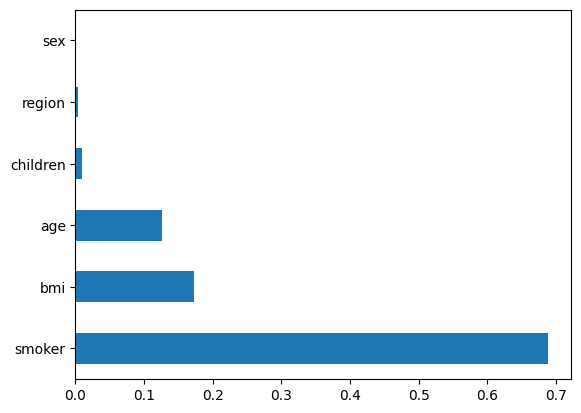

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting/Visualising the Decision Tree**

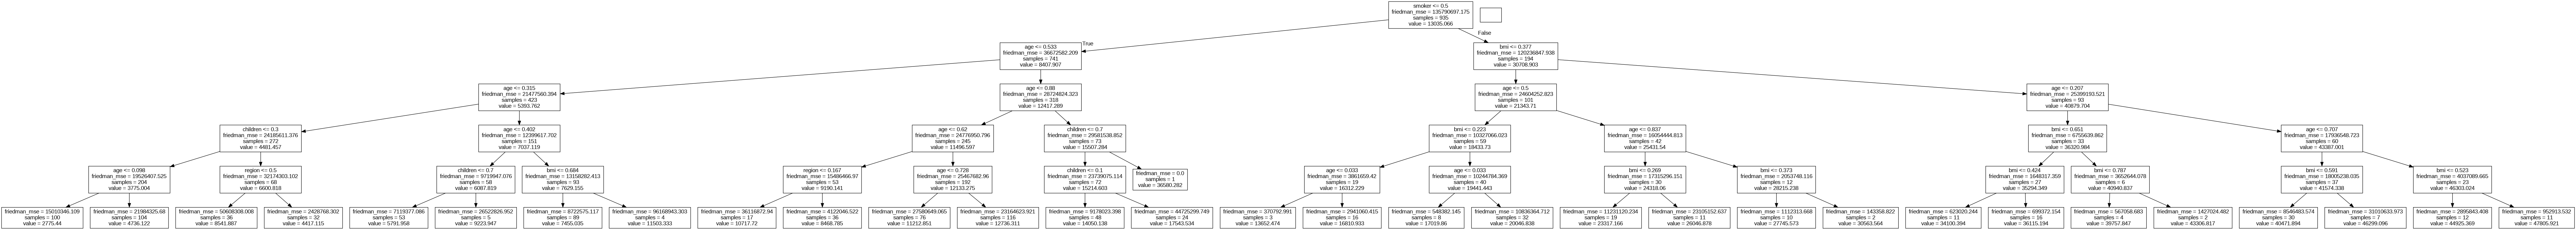

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
    feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

**Random Forest Regressor**

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.8721588571123443

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0           11751.0  
1            6989.0  
2           12053.0  
3           42813.0  
4            5938.0  
Mean Accuracy on test data: 70.31410379267778
Median Accuracy on test data: 84.32556478499728

Accuracy values for 10-fold Cross Validation:
 [69.92554231 67.78374913 70.6552908  66.56933737 70.04179738 69.46371923
 68.2764816  71.09357436 75.10343172 69.09625344]

Final 

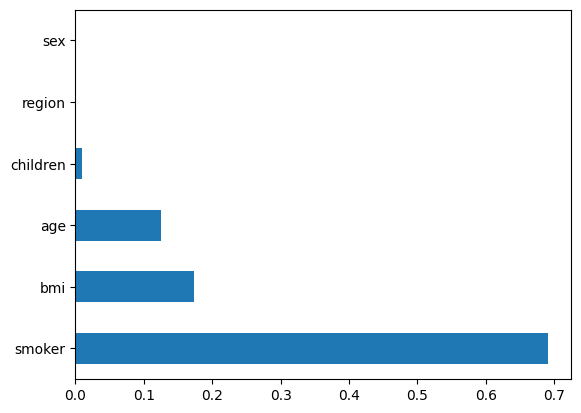

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting One of the Decision Tree in Random Forest Regressor**

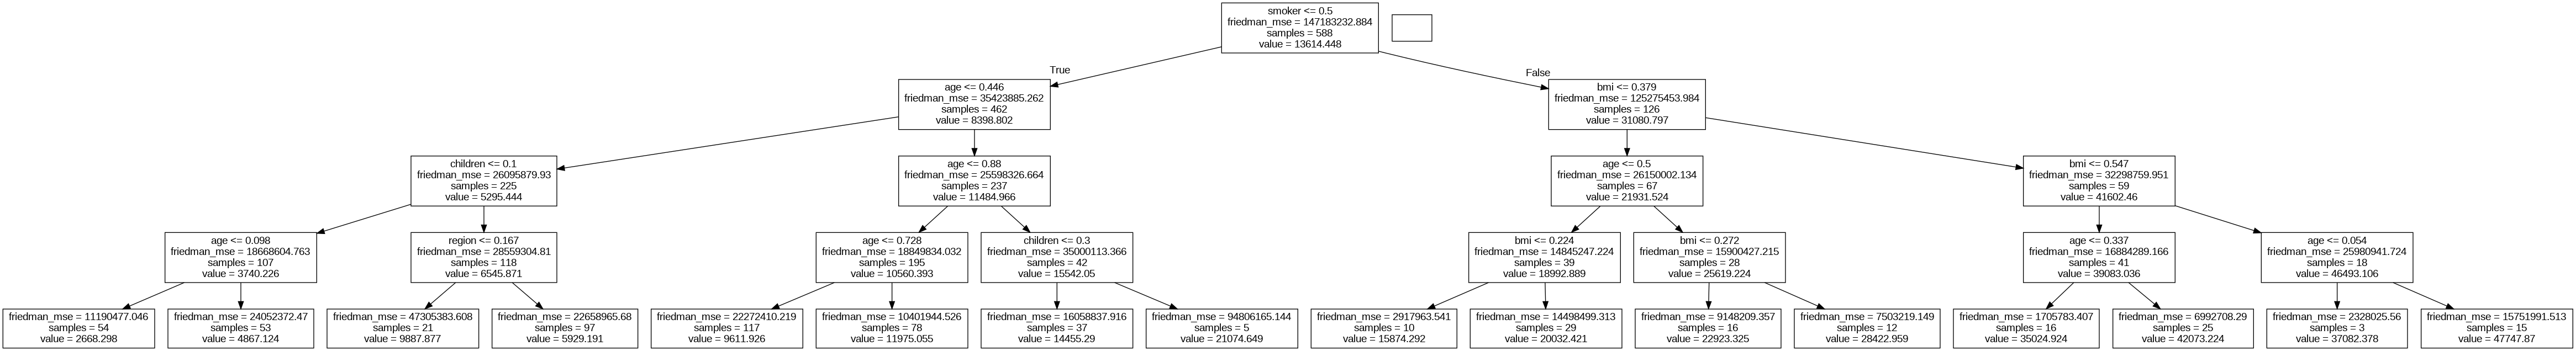

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.839533492120231

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0           13436.0  
1            7979.0  
2           14070.0  
3           43983.0  
4            7979.0  
Mean Accuracy on test data: 38.121270498890006
Median Accuracy on test data: 64.46041348858262

Accuracy values for 10-fold Cross Validation:
 [37.04036531 35.6451246  41.03085039 32.4439301  39.98526295 34.08802824
 34.0554134

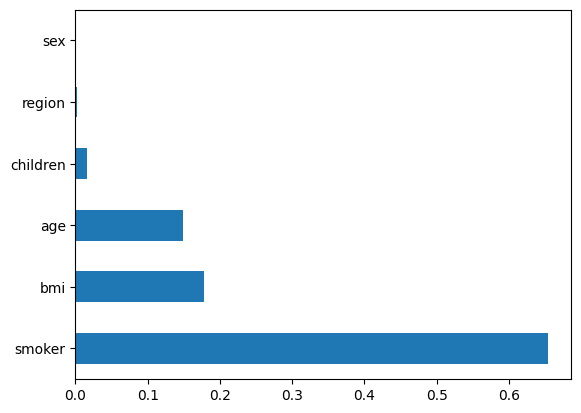

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**XGBoost Regressor**

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9139801183123929

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.2

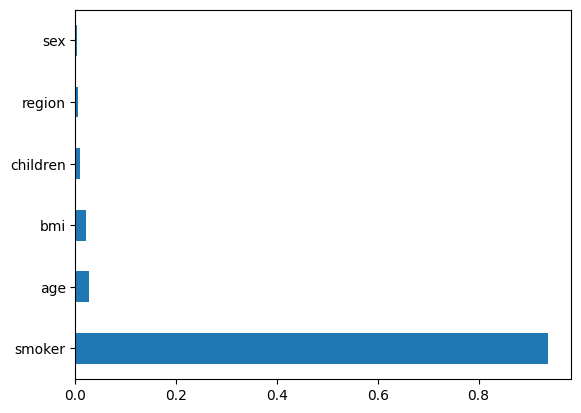

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting a single Decision tree out of XGBoost**

<Axes: >

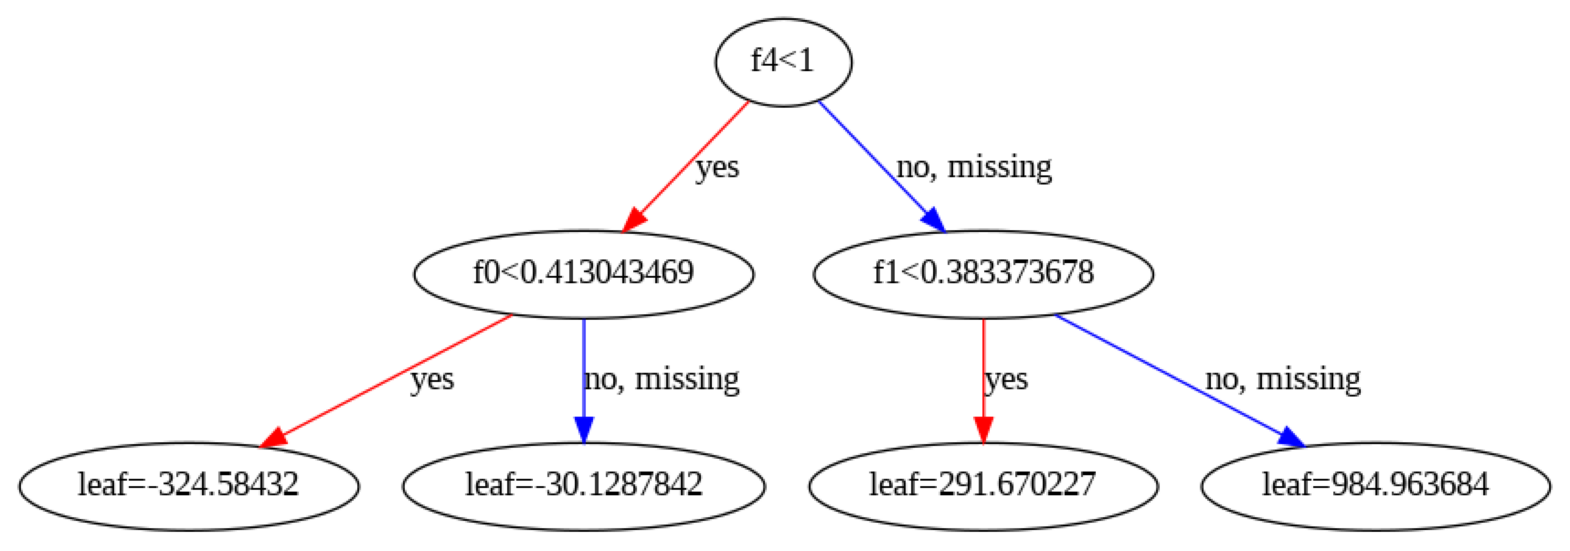

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

**K-Nearest Neighbor(KNN)**

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8688601200183593

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0            8874.0  
1            5325.0  
2           11153.0  
3           25002.0  
4            4772.0  
Mean Accuracy on test data: 64.18233505462314
Median Accuracy on test data: 87.67405021866963

Accuracy values for 10-fold Cross Validation:
 [68.36140818 59.37651648 66.08074622 65.81350797 70.95305374 65.48559391
 56.46253058 71.20443865 62.65481346 65.67577099]

Final Average Accuracy of the model: 65.21


**Support Vector Machine (SVM) Regressor**

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE

print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.09095868765944348

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex  children  smoker    region      charges  \
0  0.673913  0.176352  0.0       0.0     0.0  0.000000   8688.85885   
1  0.239130  0.259349  1.0       0.8     0.0  1.000000   5708.86700   
2  0.717391  0.549502  1.0       0.6     0.0  0.333333  11436.73815   
3  0.282609  0.495830  0.0       0.6     1.0  0.333333  38746.35510   
4  0.282609  0.603444  0.0       0.4     0.0  0.666667   4463.20510   

   Predictedcharges  
0            9286.0  
1            9209.0  
2            9288.0  
3            9422.0  
4            9226.0  
Mean Accuracy on test data: 0.10647457203269539
Median Accuracy on test data: 44.65403913773101

Accuracy values for 10-fold Cross Validation:
 [ -6.98725687  -6.7922944   11.90208086 -17.14227046   4.85746122
  -4.01669491  -4.79621576   8.20078418  19.00783415 -10.44972212]

Final Average Accuracy of the model: -0.62


# Step 21: Model Deployment


*   Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.
*   I am choosing Decision Tree Regressor as the final model it has the highest accuracy!
*   For this dataset, the most important predictor variables are 'children', 'age', 'bmi' and 'smoker'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better medical charge prediction platform/system.









In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=[ 'age','bmi','children','smoker']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 4)
(1337,)


**Cross validating the final model accuracy with less predictors**

In [ ]:

# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [69.2301908  69.78959976 72.3179419  67.31714705 71.28360708 70.15950871
 69.29116738 73.78912464 74.58275727 69.37165569]

Final Average Accuracy of the model: 70.71


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_Decision_Tree_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_Decision_Tree_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_Decision_Tree_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/capstone


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Load the preprocessed training data
    DataForML = pd.read_pickle('DataForML.pkl')

    # Define mapping dictionaries for each boolean feature
    sex_mapping = {'male': 0, 'female': 1}
    smoker_mapping = {'no': 0, 'yes': 1}
    region_mapping = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

    DataForML_Numeric = DataForML.copy()
    DataForML_Numeric['sex'] = DataForML_Numeric['sex'].map(sex_mapping)
    DataForML_Numeric['smoker'] = DataForML_Numeric['smoker'].map(smoker_mapping)
    DataForML_Numeric['region'] = DataForML_Numeric['region'].map(region_mapping)

    # Concatenate the new input data with the training data
    InputData = pd.concat([InputData, DataForML_Numeric], ignore_index=True)

    # Reorder columns to match the order used during training
    Predictors = ['age', 'bmi', 'children', 'smoker']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Load the trained model
    import pickle
    with open('Final_Decision_Tree_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)
        fileReadStream.close()

    # Generate predictions
    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=['Prediction'])

    return PredictionResult


# Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData = pd.DataFrame(data=[[62, 26.29, 0, 1], [23, 34.4, 0, 0]], columns=['age', 'bmi', 'children', 'smoker'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   age    bmi  children  smoker
0   62  26.29         0       1
1   23  34.40         0       0


,Prediction
0,26760.986315
1,4231.707560


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the medical charges tasks in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js


# Deploying the model with few parameters
# Function for predictions API

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age , inp_bmi, inp_children, inp_smoker):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_bmi, inp_children, inp_smoker]],
     columns=['age', 'bmi', 'children', 'smoker'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_age=19,
                           inp_bmi=27.9,
                           inp_children=0,
                           inp_smoker = 1
                             )

'{"Prediction":{"0":16674.4830588235}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [ ]:
!pip install flask

# Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        bmi_value=float(request.args.get('bmi'))
        children_value=float(request.args.get('children'))
        smoker_value = float(request.args.get('smoker'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_bmi=bmi_value,
                                                       inp_children=children_value,
                                                       inp_smoker = smoker_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


# Desktop App deployment: Tkinter package
* Please see gui.py

# END OF PROGRAMMING PROJECT